# ロジスティック回帰スクラッチ

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**雛形**

In [3]:
class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録

    """
    def __init__(self, num_iter, lr, bias, verbose):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)
        
    def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """
    x_1 = X
    x_theta = np.ones(x_1.shape[0])

    h_theta_1 = 1.0 / (1.0 + np.exp(-h_theta))
    
    return  h_theta_1 
        
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return
    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        pass
        return

### 【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を**シグモイド関数**に通したものです。シグモイド関数は以下の式で表されます。

$$
g(z) = \frac{1}{1+e^{−z}}.
$$

線形回帰の仮定関数は次の式でした。

$$
h_\theta(x) = \theta^T \cdot x.
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。

$$
h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}.
$$

線形回帰の仮定関数の式をそのまま使えば良さそう。

In [12]:

def _linear_hypothesis(self, X):
    """
    線形の仮定関数を計算する

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ

    Returns
    -------
      次の形のndarray, shape (n_samples, 1)
      線形の仮定関数による推定結果

    """

    h_theta_1 = 1.0 / (1.0 + np.exp(-h_theta))
    
    return h_theta_1

X = np.concatenate([x_theta.reshape(-1, 1), x_1.reshape(-1, 1)], axis=1)
theta = np.random.random(len(X[0]))
self = 0

_linear_hypothesis(self, X)

array([0.80218588, 0.86063747, 0.90388675, 0.93473206, 0.95615843,
       0.97077083, 0.98061168, 0.98718306, 0.99154637])

In [5]:
#元式
x_1 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
x_theta = np.ones(x_1.shape[0])
print(x_1)
print(x_theta)

[1 2 3 4 5 6 7 8 9]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [6]:
X = np.concatenate([x_theta.reshape(-1, 1), x_1.reshape(-1, 1)], axis=1)
theta = np.random.random(len(X[0]))

In [7]:
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
(9, 2)


In [8]:
print(theta)
print(theta.shape)

[0.97943035 0.42058218]
(2,)


In [14]:
h_theta = np.dot(X, theta)
print(h_theta.reshape(-1, 1))
print(h_theta.shape)

[[1.44397077]
 [1.93483377]
 [2.42569678]
 [2.91655979]
 [3.40742279]
 [3.8982858 ]
 [4.38914881]
 [4.88001182]
 [5.37087482]]
(9,)


In [29]:
#h_theta_exp = 1 / 1+((h_theta)/e)
h_theta_1 = 1.0 / (1.0 + np.exp(-h_theta))
print(h_theta_1)

[1.92874985e-22 2.13159824e-22 2.35578038e-22 2.60353997e-22
 2.87735666e-22 3.17997090e-22 3.51441136e-22 3.88402523e-22
 4.29251173e-22 4.74395913e-22 5.24288566e-22 5.79428476e-22
 6.40367501e-22 7.07715539e-22 7.82146632e-22 8.64405711e-22
 9.55316054e-22 1.05578752e-21 1.16682566e-21 1.28954179e-21
 1.42516408e-21 1.57504990e-21 1.74069934e-21 1.92377029e-21
 2.12609498e-21 2.34969834e-21 2.59681827e-21 2.86992803e-21
 3.17176100e-21 3.50533801e-21 3.87399763e-21 4.28142952e-21
 4.73171139e-21 5.22934982e-21 5.77932534e-21 6.38714229e-21
 7.05888391e-21 7.80127321e-21 8.62174028e-21 9.52849662e-21
 1.05306174e-20 1.16381321e-20 1.28621251e-20 1.42148466e-20
 1.57098351e-20 1.73620528e-20 1.91880359e-20 2.12060592e-20
 2.34363199e-20 2.59011392e-20 2.86251858e-20 3.16357229e-20
 3.49628809e-20 3.86399592e-20 4.27037592e-20 4.71949527e-20
 5.21584892e-20 5.76440454e-20 6.37065226e-20 7.04065961e-20
 7.78113224e-20 8.59948106e-20 9.50389638e-20 1.05034299e-19
 1.16080853e-19 1.282891

In [27]:
h_theta = np.arange(-50, 50, 0.1)
h_theta_1 = 1.0 / (1.0 + np.exp(-h_theta))

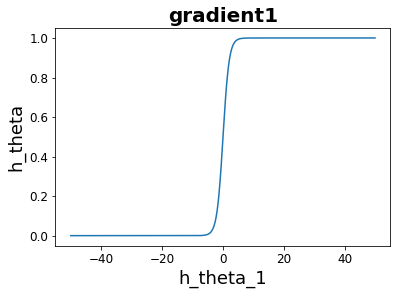

In [28]:
#計算式本当に合ってる？
plt.title("gradient1", size=20, weight='heavy')
plt.xlabel("h_theta_1", size=18)
plt.ylabel("h_theta", size=18)
plt.tick_params(labelsize=12)
plt.plot(h_theta, h_theta_1)
plt.show()

### 【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$

線形回帰のスクラッチで用いた式が使えそうなので、それを用いる。

In [21]:
#元式

y = np.array([1, 3, 5, 7, 9, 11, 13, 15, 17])
y_1 = _linear_hypothesis(self, X)

alph = 0.01

#error = (y_1- y)
#error_1 =  np.dot((y_1- y), X)#(9,)と(9,2)の計算なので転置
#error_2 = np.mean([np.dot((y_1- y), X)], axis=0)
#error_3 = alpha*np.mean([np.dot((y_1- y), X)], axis=0)
ramuda = 1

#j=0の時は正則化項は足さない
gradient[0] = alpha*np.mean([np.dot((y_1- y), X)], axis=0)
#j=0の時は正則化項を足す
gradient[1] = np.mean(ramuda*theta) + alpha*np.mean([np.dot((y_1- y), X)], axis=0)

ValueError: setting an array element with a sequence.